<a href="https://colab.research.google.com/github/atakanerdogn/my-projects/blob/main/evolution2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Various factors and their interrelationships were investigated and analyzed for human origins and evolution process. Exploratory Data Analysis (EDA) and simple machine learning algorithms were employed to explore the correlations among height, bipedality, cranial capacity, diet, and technological development.

In particular, the study examined the relationships between cranium size and technological advancement, as well as bipedality and its evolution over time. Additionally, the connections between jaw size, diet, teeth structure, skeleton, and overall anatomy were thoroughly explored.

Columns
- Genus & Species: (categorical) This column contains the genus and specific name of the species. It provides taxonomic information about each hominid included in the dataset, allowing for precise identification

- Time : This column indicates the time period during which each hominid species lived. It helps to establish chronological context and understand the temporal distribution of different hominid groups.

- Location: This column records the continent location where each hominid species lived.

- Zone: Describes either east, west, south or north of the continent

- Current Country: Records the modern-day country associated with the location where each hominid species lived, facilitating geographical comparisons.

- Habitat: This column describes the typical habitat or environment inhabited by each hominid species. It provides information about the ecological niche and adaptation strategies of different hominids throughout history.

- Cranial Capacity: This column provides data on the cranial capacity of each hominid species. Cranial capacity is a key indicator of brain size and can offer insights into cognitive abilities and evolutionary trends.

- Height: Describes the average height or stature of each hominid species

- Incisor Size: Indicates the size of the incisors in each hominid species

-Jaw Shape: Describes the shape or morphology of the jaw in each hominid species

- Torus Supraorbital: Specifies the shape or morphology of a supraorbital torus in each hominid species

- Prognathism: Indicates the degree of facial prognathism or protrusion in each hominid species

- Foramen Mágnum Position: Describes the position of the foramen magnum in each hominid species

- Canine Size: Indicates the size of the canines in each hominid species

- Canines Shape: Describes the shape of the canines in each hominid species, providing information about their dietary adaptations and social behavior.

- Tooth Enamel: Specifies the characteristics of tooth enamel in each hominid species, which may indicate aspects of dietary ecology and dental health.

- Tecno: Records the presence or absence of technological advancements

- Tecno Type: Describes the specific type or style of technology associated with each hominid species

- Biped: Indicates whether each hominid species exhibited bipedal locomotion, a key characteristic distinguishing humans from other primates.

- Arms: Describes the morphology or characteristics of the arms in each hominid species, offering insights into their locomotor adaptations and manual dexterity.

- Foots: Specifies the morphology or characteristics of the feet in each hominid species, providing information about their locomotor adaptations and foot anatomy.

- Diet:  Characterizes the dietary habits or preferences of each hominid species

- Sexual Dimorphism: Indicates the degree of sexual dimorphism

- Hip: Describes the size of the hip in each hominid species

- Vertical Front: Specifies the presence or absence of verticality or curvature of the frontal bone in each hominid species, providing information about their cranial morphology.

- Anatomy: Provides additional information about the anatomical features or characteristics of each hominid species, aiding in comprehensive morphological analyses.

- Migrated: Indicates whether each hominid species exhibited migration or movement to different geographical areas, offering insights into their dispersal patterns and population dynamics.

- Skeleton: Describes additional information about anatomy

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse, r2_score as r2

In [3]:
df = pd.read_csv('Evolution_DataSets.csv.zip')
df.head()

,Genus_&_Specie,Time,Location,Zone,Current_Country,Habitat,Cranial_Capacity,Height,Incisor_Size,Jaw_Shape,...,biped,Arms,Foots,Diet,Sexual_Dimorphism,Hip,Vertical_Front,Anatomy,Migrated,Skeleton
0,hominino Orrorin tugenencin,6.041124,Africa,oriental,Kenya,forest,144.51410,110.24323,small,conical,...,low probability,climbing,climbing,dry fruits,high,wide,no,old,no,light
1,hominino Ardipithecus ramidus / kabadda,4.383910,Africa,oriental,Ethiopia,mixed,293.96021,107.69018,small,conical,...,high probability,climbing,climbing,soft fruits,medium-high,wide,no,old,no,light
2,Australopithecus Afarensis,3.749413,Africa,oriental,Kenya,mixed,264.79849,123.76644,big,U shape,...,yes,climbing,walk,dry fruits,high,slim,no,old,no,refined
3,Australopithecus Anamensis,4.595606,Africa,oriental,Kenya,forest-gallery,403.28047,111.40831,big,U shape,...,yes,climbing,climbing,dry fruits,high,wide,no,mixed,no,light
4,Australopithecus Africanus,3.614060,Africa,south,South Africa,forest-gallery,679.15233,111.59004,small,conical,...,yes,climbing,climbing,dry fruits,high,wide,yes,old,no,light


In [4]:
df.describe()

,Time,Cranial_Capacity,Height
count,12000.000000,12000.000000,12000.000000
mean,2.532665,616.824303,131.452198
std,1.776998,356.275762,24.539191
min,0.000529,0.074910,80.009030
25%,1.050566,334.430993,112.986802
50%,2.317031,511.320200,125.508305
75%,3.656959,919.807697,153.877355
max,7.699417,1448.397470,184.981450


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Genus_&_Specie           12000 non-null  object 
 1   Time                     12000 non-null  float64
 2   Location                 12000 non-null  object 
 3   Zone                     12000 non-null  object 
 4   Current_Country          12000 non-null  object 
 5   Habitat                  12000 non-null  object 
 6   Cranial_Capacity         12000 non-null  float64
 7   Height                   12000 non-null  float64
 8   Incisor_Size             12000 non-null  object 
 9   Jaw_Shape                12000 non-null  object 
 10  Torus_Supraorbital       12000 non-null  object 
 11  Prognathism              12000 non-null  object 
 12  Foramen_Mágnum_Position  12000 non-null  object 
 13  Canine Size              12000 non-null  object 
 14  Canines_Shape         

In [6]:
df.shape

(12000, 28)

In [7]:
df.dtypes

,0
Genus_&_Specie,object
Time,float64
Location,object
Zone,object
Current_Country,object
Habitat,object
Cranial_Capacity,float64
Height,float64
Incisor_Size,object
Jaw_Shape,object


In [8]:
df.isnull().sum()

,0
Genus_&_Specie,0
Time,0
Location,0
Zone,0
Current_Country,0
Habitat,0
Cranial_Capacity,0
Height,0
Incisor_Size,0
Jaw_Shape,0


In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.columns

Index(['Genus_&_Specie', 'Time', 'Location', 'Zone', 'Current_Country',
       'Habitat', 'Cranial_Capacity', 'Height', 'Incisor_Size', 'Jaw_Shape',
       'Torus_Supraorbital', 'Prognathism', 'Foramen_Mágnum_Position',
       'Canine Size', 'Canines_Shape', 'Tooth_Enamel', 'Tecno', 'Tecno_type',
       'biped', 'Arms', 'Foots', 'Diet', 'Sexual_Dimorphism', 'Hip',
       'Vertical_Front', 'Anatomy', 'Migrated', 'Skeleton'],
      dtype='object')

In [11]:
num = df.select_dtypes(include=np.number)
num.head()

,Time,Cranial_Capacity,Height
0,6.041124,144.51410,110.24323
1,4.383910,293.96021,107.69018
2,3.749413,264.79849,123.76644
3,4.595606,403.28047,111.40831
4,3.614060,679.15233,111.59004


In [12]:
cat = df.select_dtypes(include='object')
cat.head()

,Genus_&_Specie,Location,Zone,Current_Country,Habitat,Incisor_Size,Jaw_Shape,Torus_Supraorbital,Prognathism,Foramen_Mágnum_Position,...,biped,Arms,Foots,Diet,Sexual_Dimorphism,Hip,Vertical_Front,Anatomy,Migrated,Skeleton
0,hominino Orrorin tugenencin,Africa,oriental,Kenya,forest,small,conical,very protruding,high,posterior,...,low probability,climbing,climbing,dry fruits,high,wide,no,old,no,light
1,hominino Ardipithecus ramidus / kabadda,Africa,oriental,Ethiopia,mixed,small,conical,very protruding,high,semi-anterior,...,high probability,climbing,climbing,soft fruits,medium-high,wide,no,old,no,light
2,Australopithecus Afarensis,Africa,oriental,Kenya,mixed,big,U shape,very protruding,high,anterior,...,yes,climbing,walk,dry fruits,high,slim,no,old,no,refined
3,Australopithecus Anamensis,Africa,oriental,Kenya,forest-gallery,big,U shape,very protruding,high,anterior,...,yes,climbing,climbing,dry fruits,high,wide,no,mixed,no,light
4,Australopithecus Africanus,Africa,south,South Africa,forest-gallery,small,conical,very protruding,medium-high,anterior,...,yes,climbing,climbing,dry fruits,high,wide,yes,old,no,light


<ipython-input-13-c911f9527800>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Location', data=cat, palette = 'Set2')


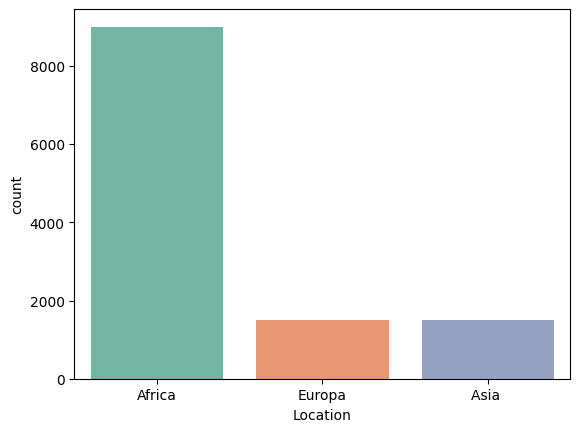

In [13]:
sns.countplot(x='Location', data=cat, palette = 'Set2')

plt.show()


<ipython-input-14-8703123c689d>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Habitat', data=cat, palette = 'Set2')


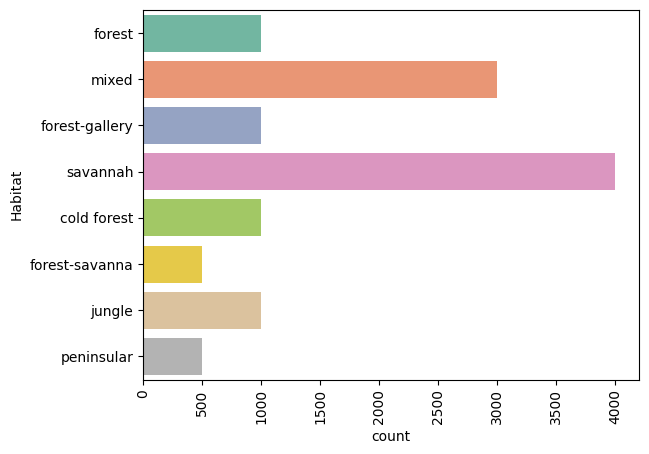

In [14]:
sns.countplot(y='Habitat', data=cat, palette = 'Set2')
plt.xticks(rotation=90)
plt.show()

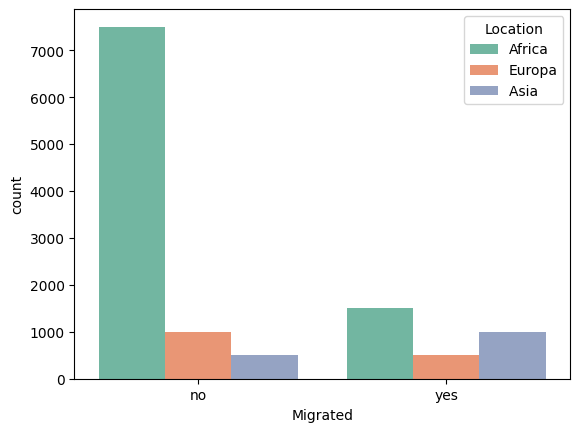

In [15]:
sns.countplot(x='Migrated',hue='Location', data=cat, palette = 'Set2')
plt.show()

<Axes: xlabel='Migrated', ylabel='count'>

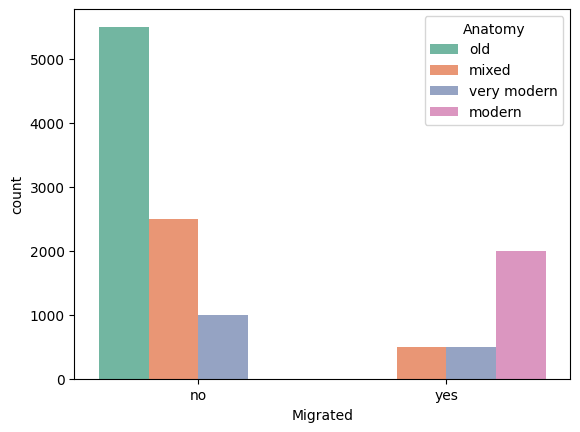

In [16]:
sns.countplot(x='Migrated',hue='Anatomy', data=cat, palette = 'Set2')

In [17]:
cat.columns

Index(['Genus_&_Specie', 'Location', 'Zone', 'Current_Country', 'Habitat',
       'Incisor_Size', 'Jaw_Shape', 'Torus_Supraorbital', 'Prognathism',
       'Foramen_Mágnum_Position', 'Canine Size', 'Canines_Shape',
       'Tooth_Enamel', 'Tecno', 'Tecno_type', 'biped', 'Arms', 'Foots', 'Diet',
       'Sexual_Dimorphism', 'Hip', 'Vertical_Front', 'Anatomy', 'Migrated',
       'Skeleton'],
      dtype='object')

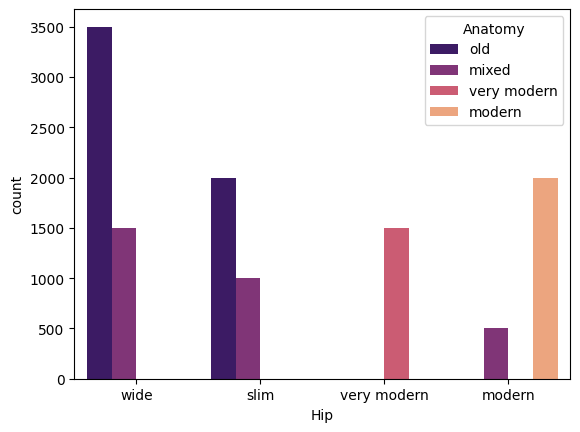

In [18]:
sns.countplot(x='Hip',hue='Anatomy', data=cat, palette='magma' )
plt.show()

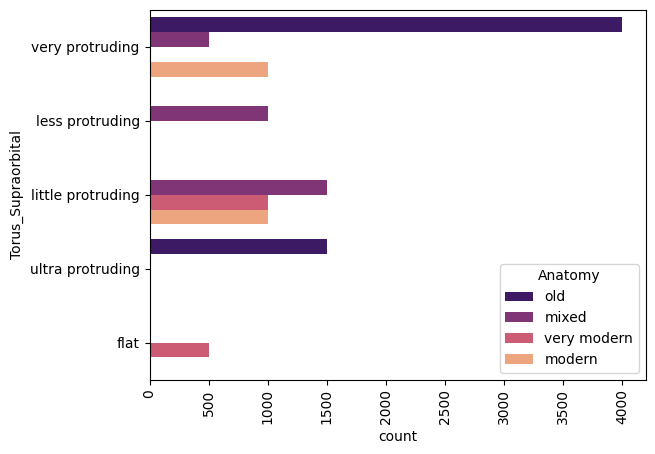

In [19]:
sns.countplot(y='Torus_Supraorbital', hue='Anatomy', data=cat, palette='magma')
plt.xticks(rotation=90)
plt.show()


<ipython-input-20-40f8bc5c502e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Prognathism', data=cat, palette='magma')


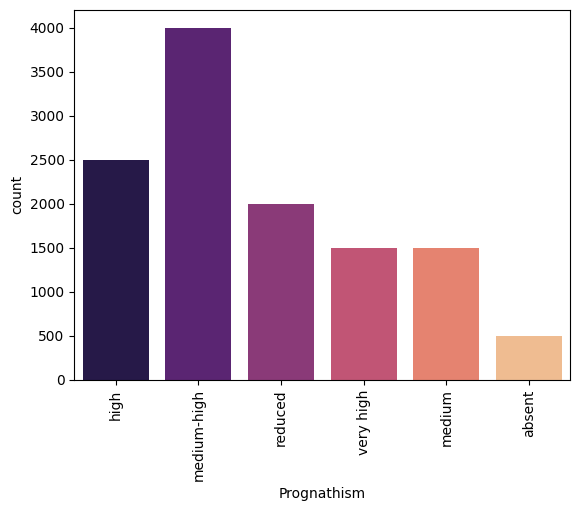

In [20]:
sns.countplot(x='Prognathism', data=cat, palette='magma')
plt.xticks(rotation=90)
plt.show()

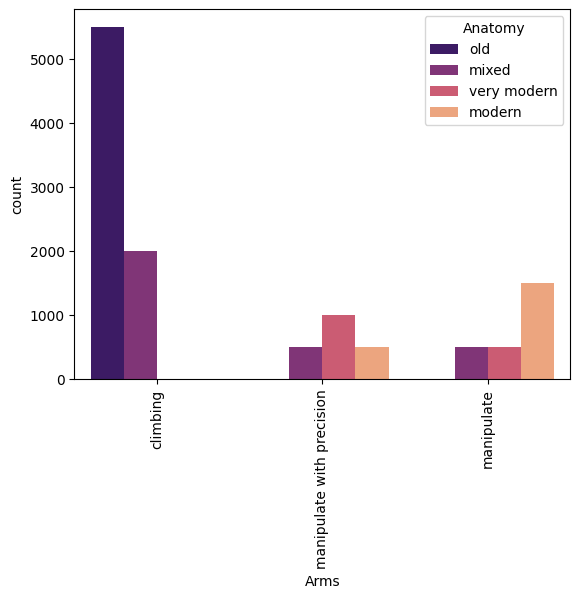

In [21]:
sns.countplot(x='Arms', hue='Anatomy', data=cat, palette='magma')
plt.xticks(rotation=90)
plt.show()

<ipython-input-22-606a9eea3f90>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Torus_Supraorbital', data=cat, palette='mako')


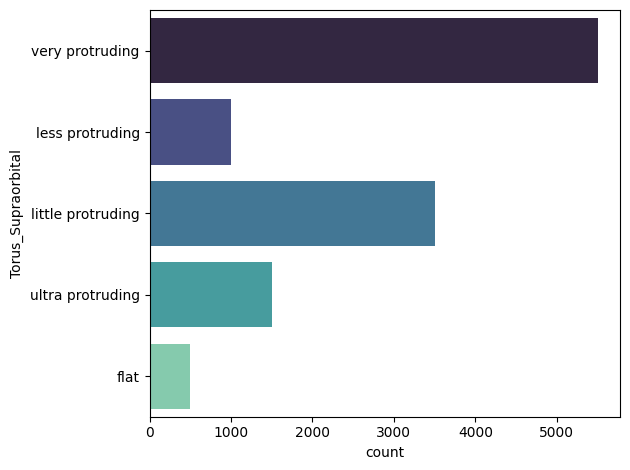

In [22]:
sns.countplot(y='Torus_Supraorbital', data=cat, palette='mako')
plt.tight_layout()
plt.show()

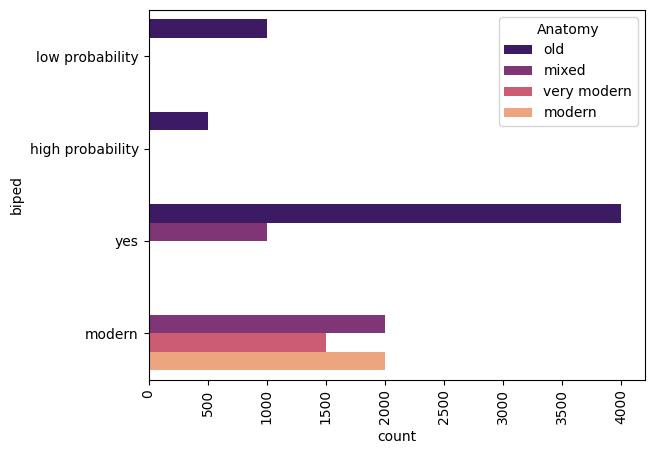

In [23]:
sns.countplot(y='biped', hue='Anatomy', data=cat, palette='magma')
plt.xticks(rotation=90)
plt.show()

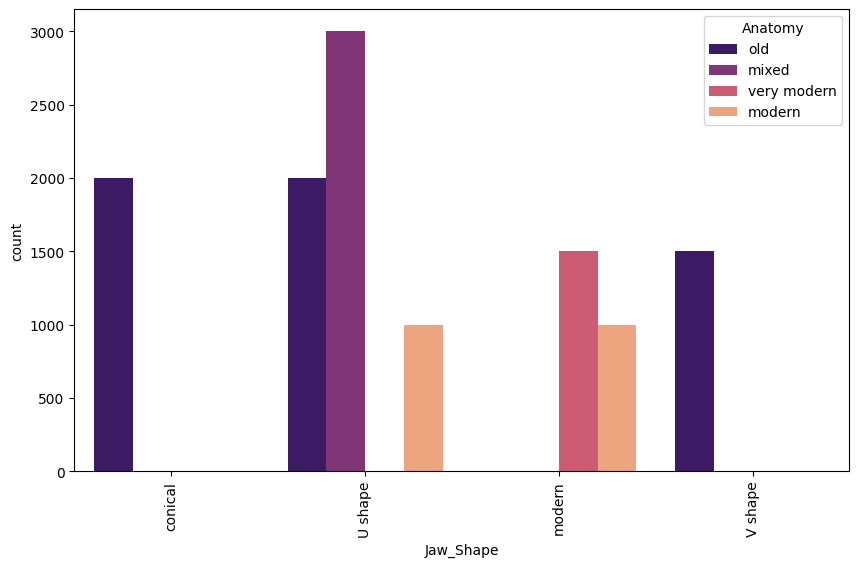

In [24]:
plt.figure(figsize=(10,6))
sns.countplot(x='Jaw_Shape', hue='Anatomy', data=cat, palette='magma')
plt.xticks(rotation=90)
plt.show()

<ipython-input-25-22bb876bf570>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='biped', y='Cranial_Capacity', data=df, palette='magma')


Text(0, 0.5, 'Count')

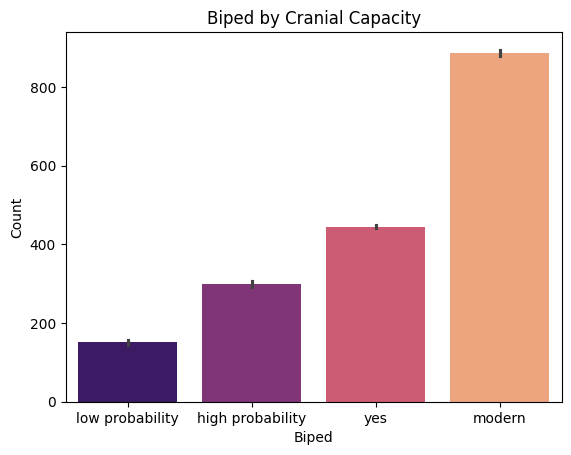

In [25]:
biped_cranial = df.groupby('biped')['Cranial_Capacity'].value_counts().unstack().fillna(0)
biped_cranial

sns.barplot(x='biped', y='Cranial_Capacity', data=df, palette='magma')
plt.title('Biped by Cranial Capacity')
plt.xlabel('Biped')
plt.ylabel('Count')

<ipython-input-26-84b2df859173>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='biped', y='Cranial_Capacity', data=df, palette='magma')


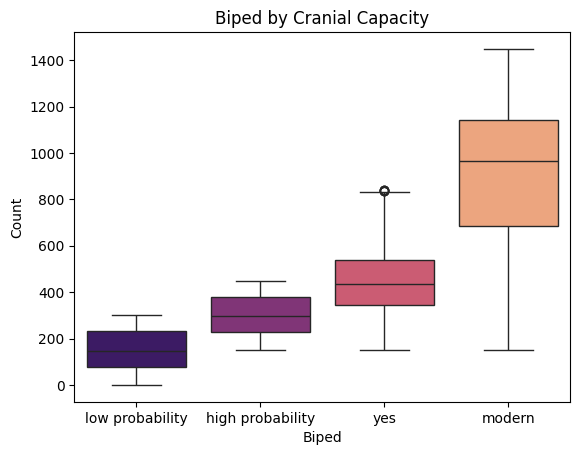

In [26]:
biped_cranial = df.groupby('biped')['Cranial_Capacity'].value_counts().unstack().fillna(0)
biped_cranial

sns.boxplot(x='biped', y='Cranial_Capacity', data=df, palette='magma')
plt.title('Biped by Cranial Capacity')
plt.xlabel('Biped')
plt.ylabel('Count')
plt.show()

<ipython-input-27-54783872fe23>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Incisor_Size', data=cat, palette='magma')


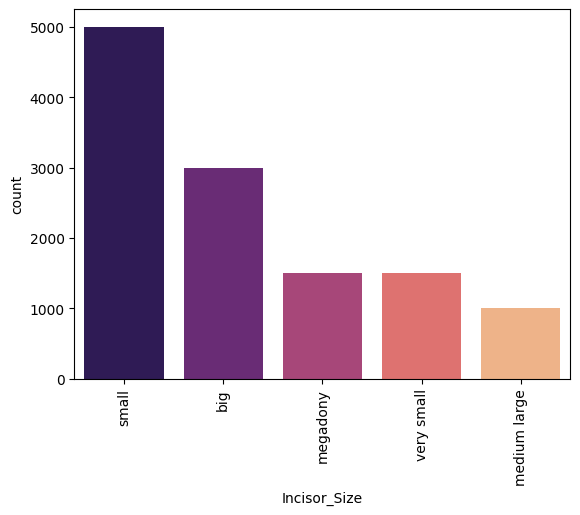

In [27]:
sns.countplot(x='Incisor_Size', data=cat, palette='magma')
plt.xticks(rotation=90)
plt.show()

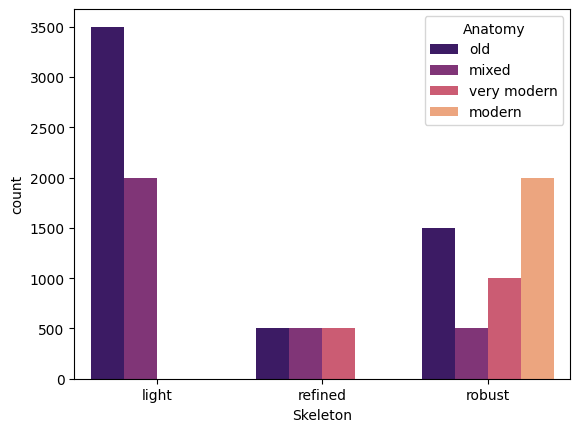

In [28]:
sns.countplot(x='Skeleton', hue='Anatomy', data=cat, palette='magma')
plt.show()

In [29]:
num.columns

Index(['Time', 'Cranial_Capacity', 'Height'], dtype='object')

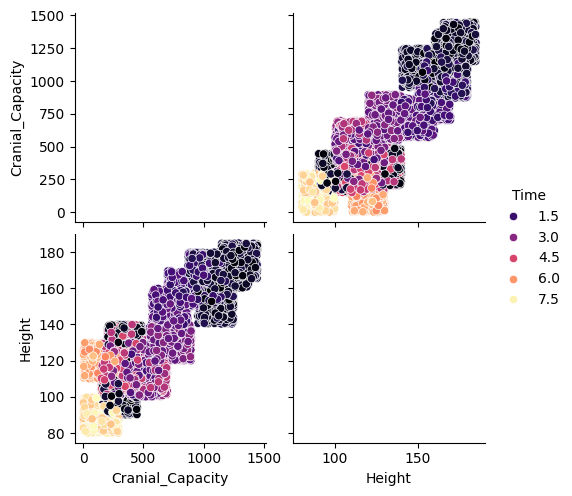

In [30]:
sns.pairplot(num, hue='Time', palette='magma')
plt.show()

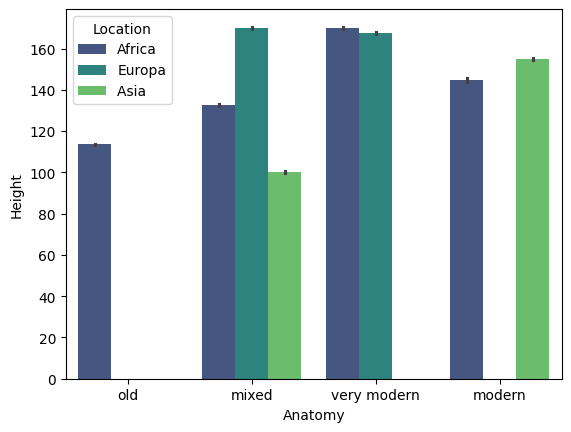

In [31]:
sns.barplot(x='Anatomy', y='Height', data=df, hue='Location', palette='viridis')
plt.show()

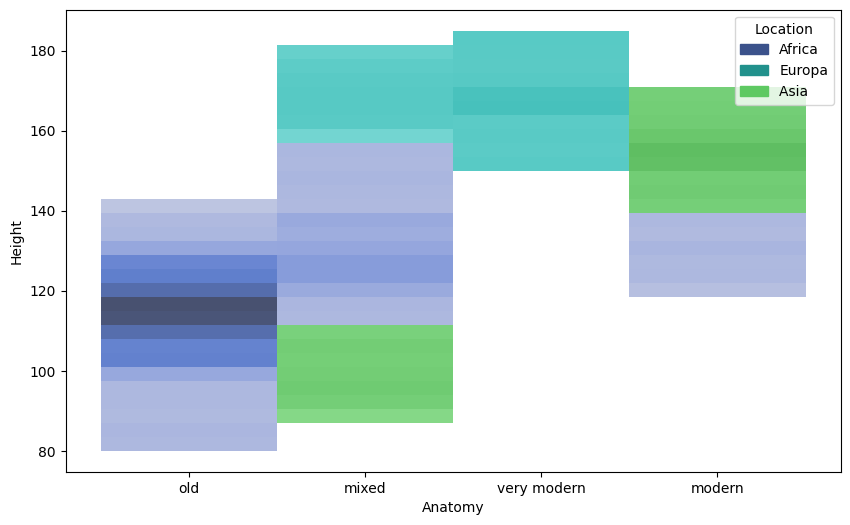

In [32]:
plt.figure(figsize=(10,6))
sns.histplot(x='Anatomy', y='Height', data=df, hue='Location', palette='viridis')
plt.show()

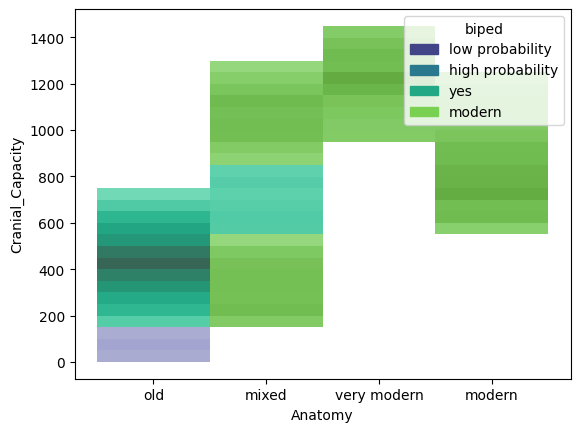

In [33]:
sns.histplot(x='Anatomy', y='Cranial_Capacity', data=df, hue='biped', palette='viridis')
plt.show()

In [56]:
df.columns

Index(['Genus_&_Specie', 'Time', 'Location', 'Zone', 'Current_Country',
       'Habitat', 'Cranial_Capacity', 'Height', 'Incisor_Size', 'Jaw_Shape',
       'Torus_Supraorbital', 'Prognathism', 'Foramen_Mágnum_Position',
       'Canine Size', 'Canines_Shape', 'Tooth_Enamel', 'Tecno', 'Tecno_type',
       'biped', 'Arms', 'Foots', 'Diet', 'Sexual_Dimorphism', 'Hip',
       'Vertical_Front', 'Anatomy', 'Migrated', 'Skeleton'],
      dtype='object')

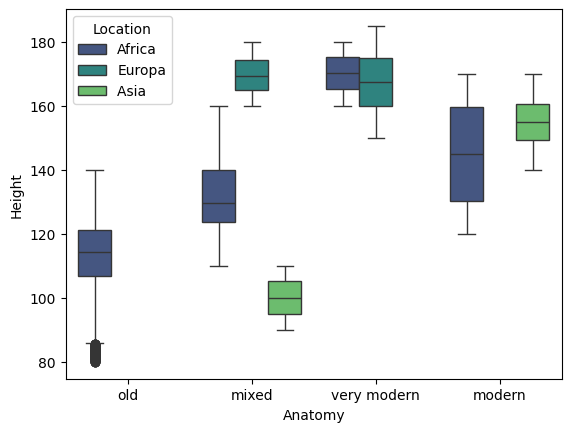

In [34]:
sns.boxplot(x='Anatomy', y='Height', data=df, hue='Location', palette='viridis')
plt.show()

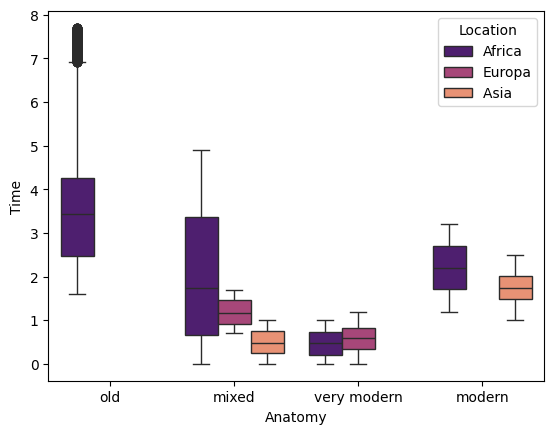

In [35]:
sns.boxplot(x='Anatomy', y='Time', data=df, hue='Location', palette='magma')
plt.show()

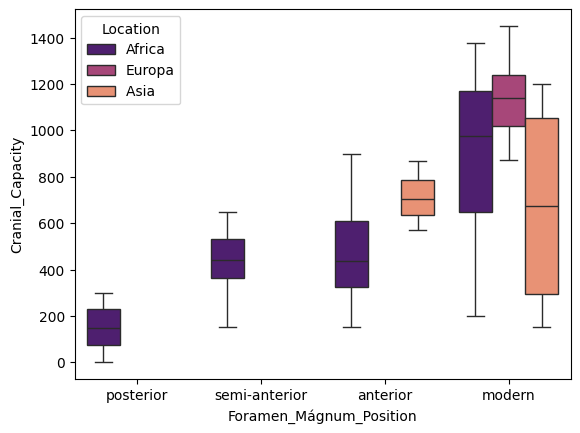

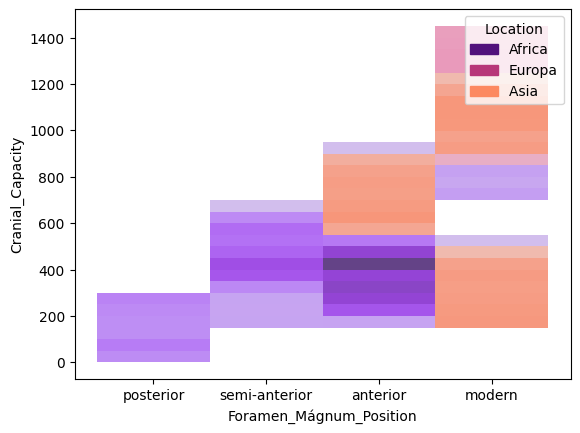

In [36]:
sns.boxplot(x='Foramen_Mágnum_Position', y='Cranial_Capacity', data=df, hue='Location', palette='magma')
plt.show()

sns.histplot(x='Foramen_Mágnum_Position', y='Cranial_Capacity', data=df, hue='Location', palette='magma')
plt.show()


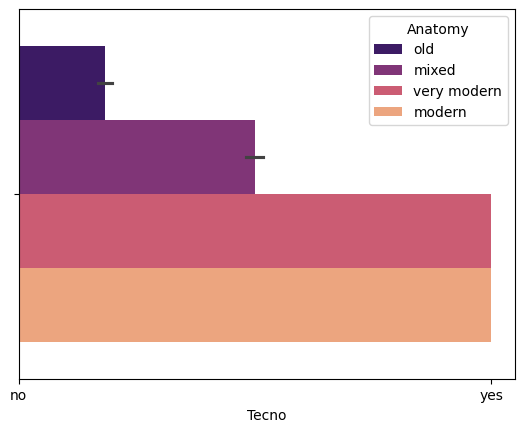

In [37]:
sns.barplot(x='Tecno', hue = 'Anatomy', data=df, palette='magma')
plt.show()

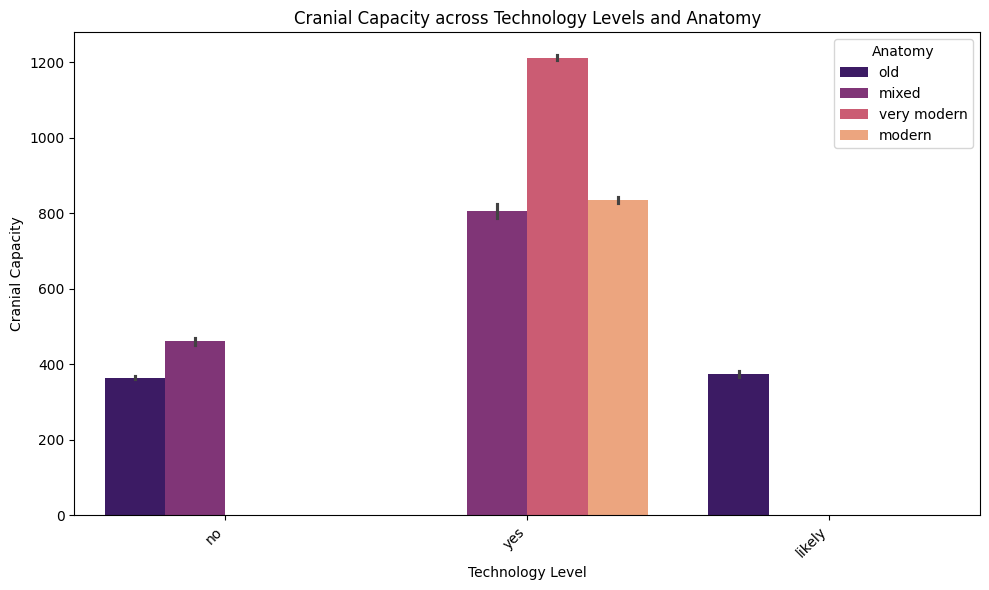

In [38]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Tecno', y='Cranial_Capacity', hue='Anatomy', data=df, palette='magma')
plt.title('Cranial Capacity across Technology Levels and Anatomy')
plt.xlabel('Technology Level')
plt.ylabel('Cranial Capacity')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Anatomy')
plt.tight_layout()
plt.show()

In [39]:
df.columns

Index(['Genus_&_Specie', 'Time', 'Location', 'Zone', 'Current_Country',
       'Habitat', 'Cranial_Capacity', 'Height', 'Incisor_Size', 'Jaw_Shape',
       'Torus_Supraorbital', 'Prognathism', 'Foramen_Mágnum_Position',
       'Canine Size', 'Canines_Shape', 'Tooth_Enamel', 'Tecno', 'Tecno_type',
       'biped', 'Arms', 'Foots', 'Diet', 'Sexual_Dimorphism', 'Hip',
       'Vertical_Front', 'Anatomy', 'Migrated', 'Skeleton'],
      dtype='object')

In [40]:
num.columns

Index(['Time', 'Cranial_Capacity', 'Height'], dtype='object')

In [41]:
cat.columns

Index(['Genus_&_Specie', 'Location', 'Zone', 'Current_Country', 'Habitat',
       'Incisor_Size', 'Jaw_Shape', 'Torus_Supraorbital', 'Prognathism',
       'Foramen_Mágnum_Position', 'Canine Size', 'Canines_Shape',
       'Tooth_Enamel', 'Tecno', 'Tecno_type', 'biped', 'Arms', 'Foots', 'Diet',
       'Sexual_Dimorphism', 'Hip', 'Vertical_Front', 'Anatomy', 'Migrated',
       'Skeleton'],
      dtype='object')

<Figure size 1000x600 with 0 Axes>

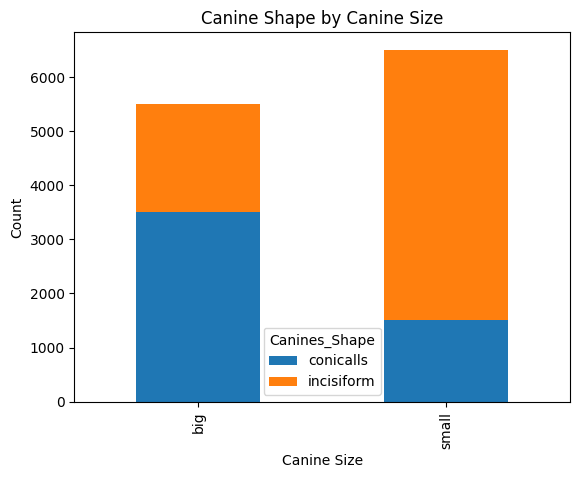

In [42]:
canine = df.groupby('Canine Size')['Canines_Shape'].value_counts().unstack().fillna(0)
canine

plt.figure(figsize=(10, 6))
canine.plot(kind='bar', stacked=True)
plt.title('Canine Shape by Canine Size')
plt.xlabel('Canine Size')
plt.ylabel('Count')
plt.show()

<Figure size 1000x600 with 0 Axes>

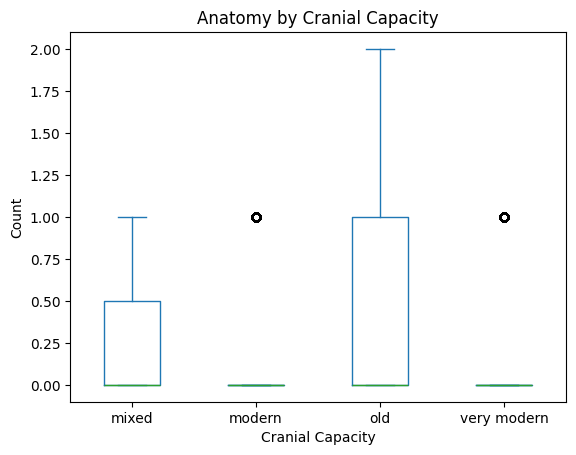

In [43]:
cranial = df.groupby('Cranial_Capacity')['Anatomy'].value_counts().unstack().fillna(0)
cranial

plt.figure(figsize=(10, 6))
cranial.plot(kind='box', stacked=True)
plt.title('Anatomy by Cranial Capacity')
plt.xlabel('Cranial Capacity')
plt.ylabel('Count')
plt.show()

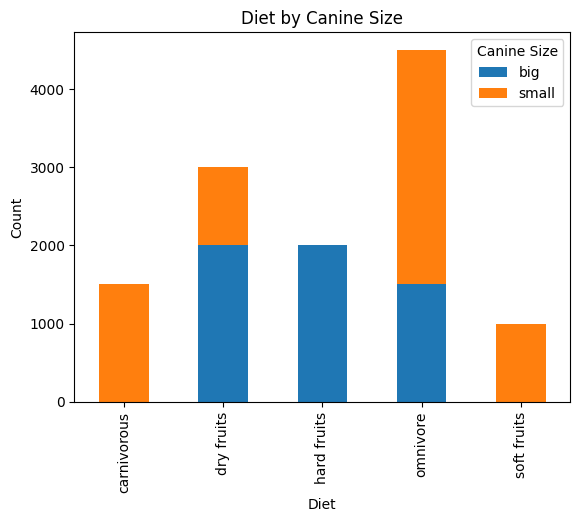

In [44]:
diet = df.groupby('Diet')['Canine Size'].value_counts().unstack().fillna(0)
diet

diet.plot(kind='bar', stacked=True)
plt.title('Diet by Canine Size')
plt.xlabel('Diet')
plt.ylabel('Count')
plt.show()


In [45]:
df.columns

Index(['Genus_&_Specie', 'Time', 'Location', 'Zone', 'Current_Country',
       'Habitat', 'Cranial_Capacity', 'Height', 'Incisor_Size', 'Jaw_Shape',
       'Torus_Supraorbital', 'Prognathism', 'Foramen_Mágnum_Position',
       'Canine Size', 'Canines_Shape', 'Tooth_Enamel', 'Tecno', 'Tecno_type',
       'biped', 'Arms', 'Foots', 'Diet', 'Sexual_Dimorphism', 'Hip',
       'Vertical_Front', 'Anatomy', 'Migrated', 'Skeleton'],
      dtype='object')

In [46]:
corr_matrix = num.corr()
corr_matrix

corr_matrix.style.background_gradient(cmap='coolwarm')

,Time,Cranial_Capacity,Height
Time,1.000000,-0.662638,-0.594751
Cranial_Capacity,-0.662638,1.000000,0.845925
Height,-0.594751,0.845925,1.000000


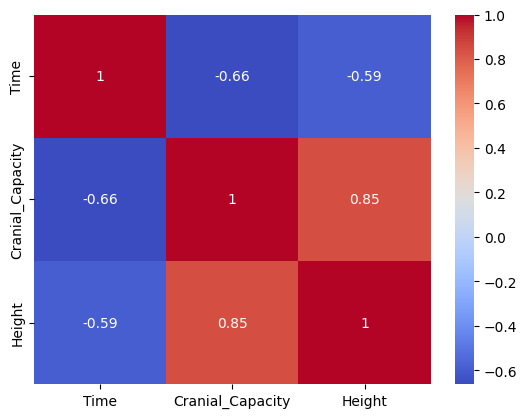

In [47]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

<ipython-input-48-67cf69e83ac8>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Location', y='Height', data=df, palette='magma')


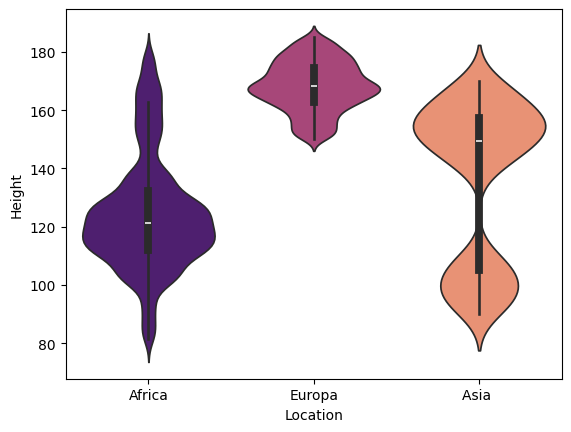

In [48]:
sns.violinplot(x='Location', y='Height', data=df, palette='magma')
plt.show()

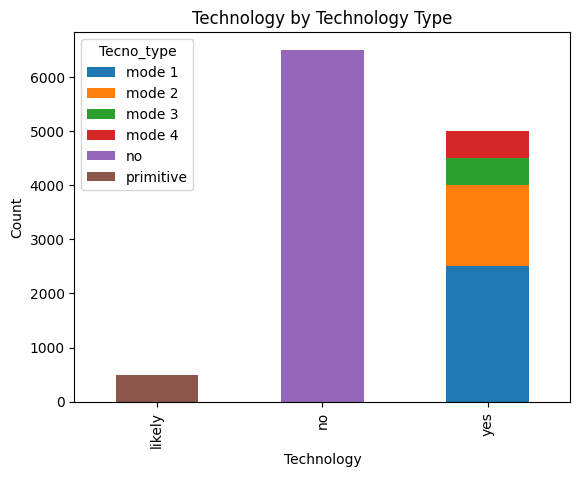

In [49]:
tech = df.groupby('Tecno')['Tecno_type'].value_counts().unstack().fillna(0)
tech

tech.plot(kind='bar', stacked=True)
plt.title('Technology by Technology Type')
plt.xlabel('Technology')
plt.ylabel('Count')
plt.show()

In [50]:
corr_matrix = num.corr()
corr_matrix['Time']
corr_matrix['Cranial_Capacity']

,Cranial_Capacity
Time,-0.662638
Cranial_Capacity,1.000000
Height,0.845925


In [51]:
corr_matrix.style.background_gradient(cmap='coolwarm')

,Time,Cranial_Capacity,Height
Time,1.000000,-0.662638,-0.594751
Cranial_Capacity,-0.662638,1.000000,0.845925
Height,-0.594751,0.845925,1.000000


In [52]:
cranial = df.groupby('Cranial_Capacity')[['Height', 'Time']].value_counts().unstack().fillna(0)
cranial.head()

,Time,0.000529,0.000641,0.000836,0.001098,0.001334,0.001704,0.001755,0.001823,0.002170,0.002310,...,7.680522,7.683603,7.689276,7.693228,7.693844,7.694635,7.697144,7.698101,7.699259,7.699417
Cranial_Capacity,Height,,,,,,,,,,,,,,,,,,,,,
0.07491,88.10722,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.27456,125.64427,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0.88524,82.92957,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.09983,91.59733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.13200,96.69586,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Mean Squared Error: 29641.104112325524
R-squared: 0.7639748266310009


<ipython-input-53-f9e4e377f1f5>:17: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=y_test,y= y_pred, palette='viridis')


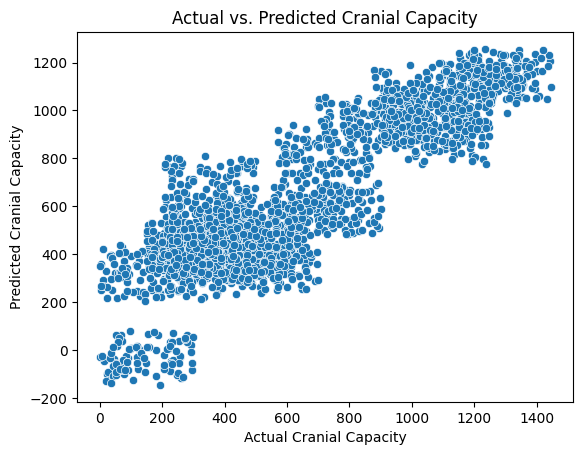

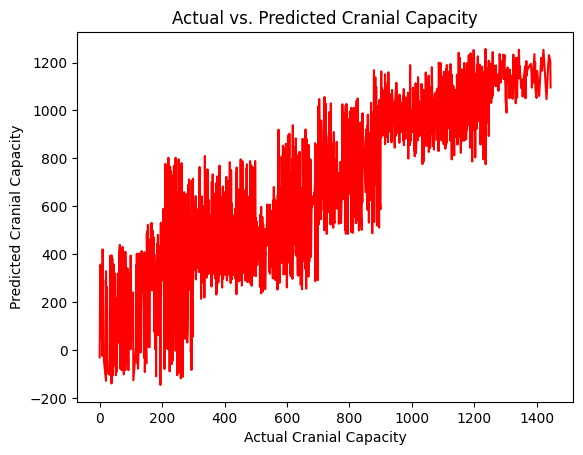

In [53]:
x = num.drop('Cranial_Capacity', axis=1)
y = num['Cranial_Capacity']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse_value = mse(y_test, y_pred)
r2_value = r2(y_test, y_pred)

print(f"Mean Squared Error: {mse_value}")
print(f"R-squared: {r2_value}")

sns.scatterplot(x=y_test,y= y_pred, palette='viridis')
plt.xlabel('Actual Cranial Capacity')
plt.ylabel('Predicted Cranial Capacity')
plt.title('Actual vs. Predicted Cranial Capacity')
plt.show()

sns.lineplot(x=y_test, y=y_pred, color='red')
plt.xlabel('Actual Cranial Capacity')
plt.ylabel('Predicted Cranial Capacity')
plt.title('Actual vs. Predicted Cranial Capacity')
plt.show()